# **Time Series Analysis**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Load the dataset
df = pd.read_csv(r"C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 6\sales_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    366 non-null    object
 1   Sales   366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# Convert ORDERDATE to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

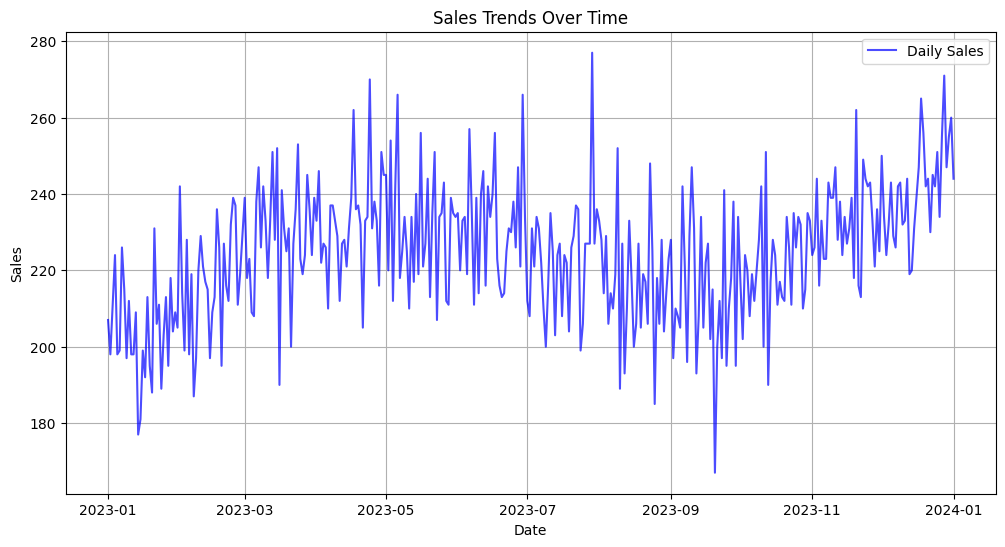

In [6]:
# Aggregate sales by date
df_daily_sales = df.groupby('Date').sum().reset_index()[['Date', 'Sales']]

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sales['Date'], df_daily_sales['Sales'], label='Daily Sales', color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.grid()
plt.show()



C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\koust\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


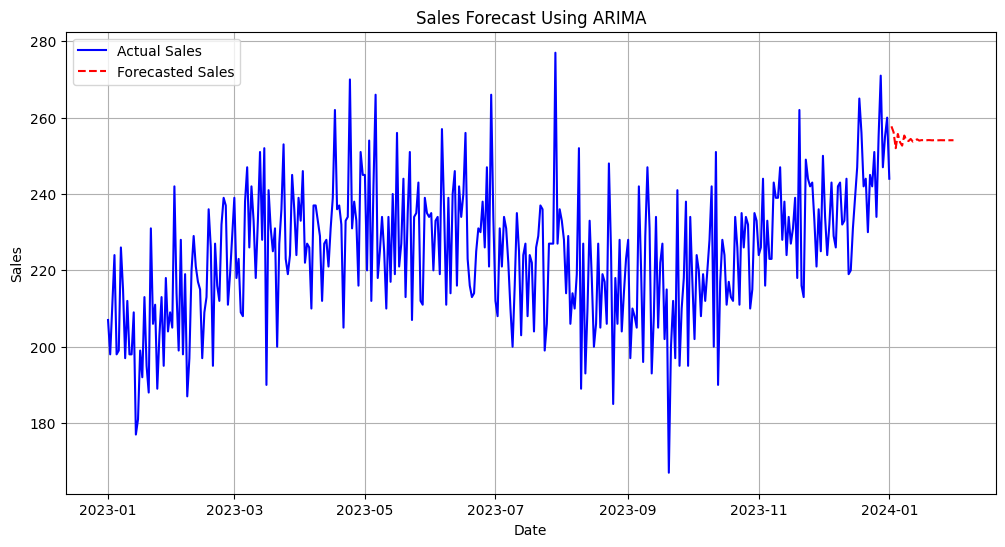

In [7]:
# Set index for time series forecasting
df_daily_sales.set_index('Date', inplace=True)

# Apply ARIMA for forecasting
model = ARIMA(df_daily_sales['Sales'], order=(5,1,0))  # You may tune the order values (p,d,q)
model_fit = model.fit()

# Forecast future sales
forecast_steps = 30  # Predict next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates for the forecast
future_dates = pd.date_range(start=df_daily_sales.index[-1], periods=forecast_steps+1, freq='D')[1:]
df_forecast = pd.DataFrame({'Date': future_dates, 'Forecasted Sales': forecast.values})

# Plot forecasted vs actual sales
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sales.index, df_daily_sales['Sales'], label='Actual Sales', color='blue')
plt.plot(df_forecast['Date'], df_forecast['Forecasted Sales'], label='Forecasted Sales', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast Using ARIMA')
plt.legend()
plt.grid()
plt.show()



In [8]:
# Evaluate forecast accuracy
actual_sales = df_daily_sales['Sales'][-forecast_steps:].values if len(df_daily_sales) > forecast_steps else df_daily_sales['Sales'].values
predicted_sales = forecast.values[:len(actual_sales)]
mape = mean_absolute_percentage_error(actual_sales, predicted_sales) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 6.50%


# **Predicting Heart Disease Using Logistic Regression**




In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv(r"C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 6\heart_disease.csv")


In [11]:
# Display dataset info
print("Dataset Information:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Handle missing values by dropping rows with NaN values
df.dropna(inplace=True)

# Remove duplicate records
df.drop_duplicates(inplace=True)

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            270 non-null    int64 
 1   BP             270 non-null    int64 
 2   cholestrol     270 non-null    int64 
 3   heart disease  270 non-null    int64 
 4   gender         270 non-null    object
dtypes: int64(4), object(1)
memory usage: 10.7+ KB
None

Missing Values:

age              0
BP               0
cholestrol       0
heart disease    0
gender           0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['heart disease'])
y = df['heart disease']

# Encode gender to numeric
le = LabelEncoder()
X['gender'] = le.fit_transform(X['gender'])  # Male -> 1, Female -> 0

In [14]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [15]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display model evaluation results
print("\n Model Evaluation:")
print(f" Accuracy: {accuracy:.2f}")
print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1 Score: {f1:.2f}")




 Model Evaluation:
 Accuracy: 0.54
 Precision: 0.36
 Recall: 0.24
 F1 Score: 0.29


In [16]:
# Generate and display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[24  9]
 [16  5]]


In [17]:
# Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.73      0.66        33
           1       0.36      0.24      0.29        21

    accuracy                           0.54        54
   macro avg       0.48      0.48      0.47        54
weighted avg       0.51      0.54      0.51        54



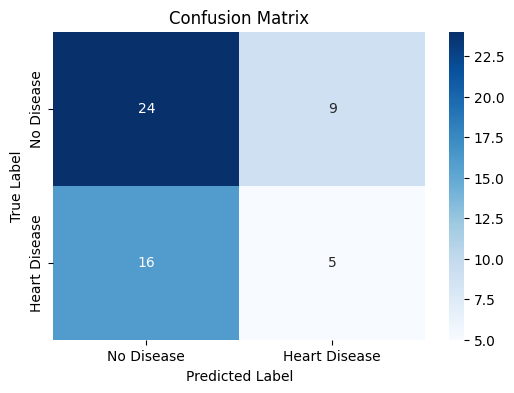

In [18]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()